# Compresión de imagen usando SVD

Cargamos una imagen que utilizaremos como un `np.array` tridimensional.

In [42]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = 'data/galaxia.jpg'

A = imread(image_path)

Visualizamos la imagen, cargada. Hemos tomado una imagen que contiene muchos detalles para que la compresión sea más evidente.

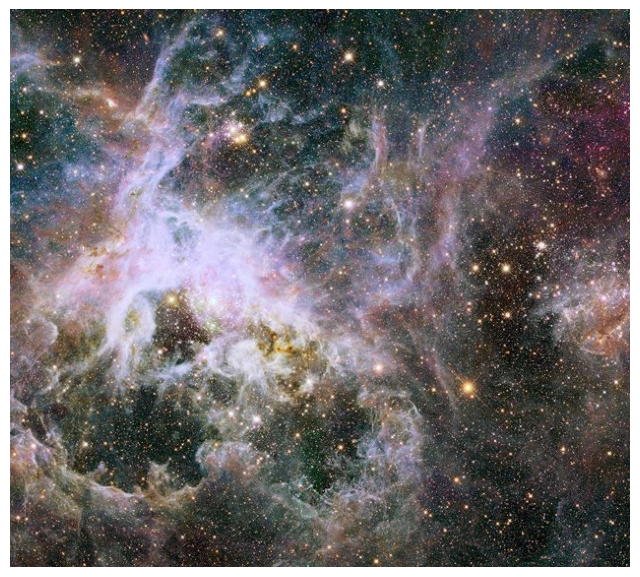

In [43]:
img = plt.imshow(A)
plt.axis('off')
plt.show()

SVD funciona sobre matrices bidimensionales, por lo que por simplicidad vamos a trabajar con la imagen en escala de grises, par no repetir las mismas operaciones para cada canal de color $RGB$.

Convertiremos la imagen original a escala de grises y la visualizamos. Para esto, promediamos los valores de los tres canales (rojo, verde y azul). Una imagen en escala de grises se representa como una matriz bidimensional. A continuación usamos la función `imshow` de `matplotlib` con el mapa de colores `gray` para mostrar la imagen en escala de grises.

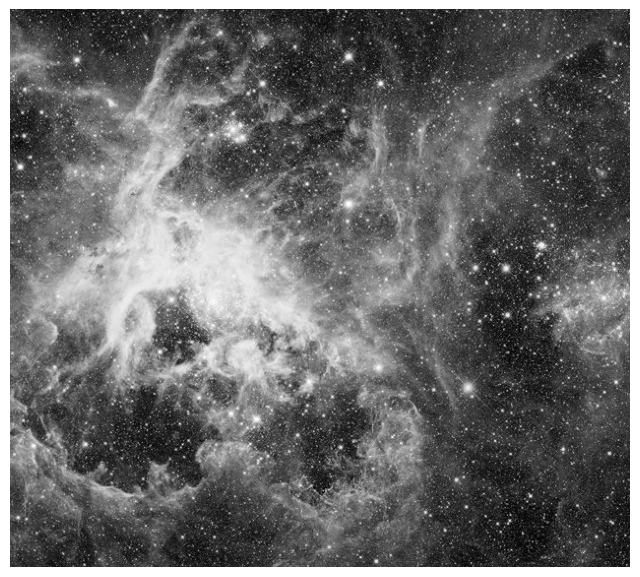

In [44]:
X = np.mean(A, axis = 2) 
plt.imshow(X, cmap='gray')
plt.axis('off')
plt.imsave('output/grayscale_image.png', X, cmap='gray')
plt.show()


Obtenemos el tamaño de la imagen, ya que la usaremos más adelante para reconstruir la imagen comprimida.

In [45]:
X.shape

(567, 630)

Hacemos la descomposición en valores singulares (SVD) de la imagen en escala de grises. Para ello usamos la función `svd` de `np.linalg`, que nos devuelve las matrices `U`, `s` y `VT`. La matriz `s` contiene los valores singulares en forma de vector, mientras que las matrices `U` y `VT` contienen los vectores singulares izquierdos y derechos, respectivamente.

In [46]:
U, s, VT = np.linalg.svd(X) 
U.shape, s.shape, VT.shape

((567, 567), (567,), (630, 630))

Graficamos la tendencia de:
- Los valores singulares $\sigma_k$
- la fracción acumulada de valores singulares: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- la fracción de la "varianza explicada": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Varianza explicada')

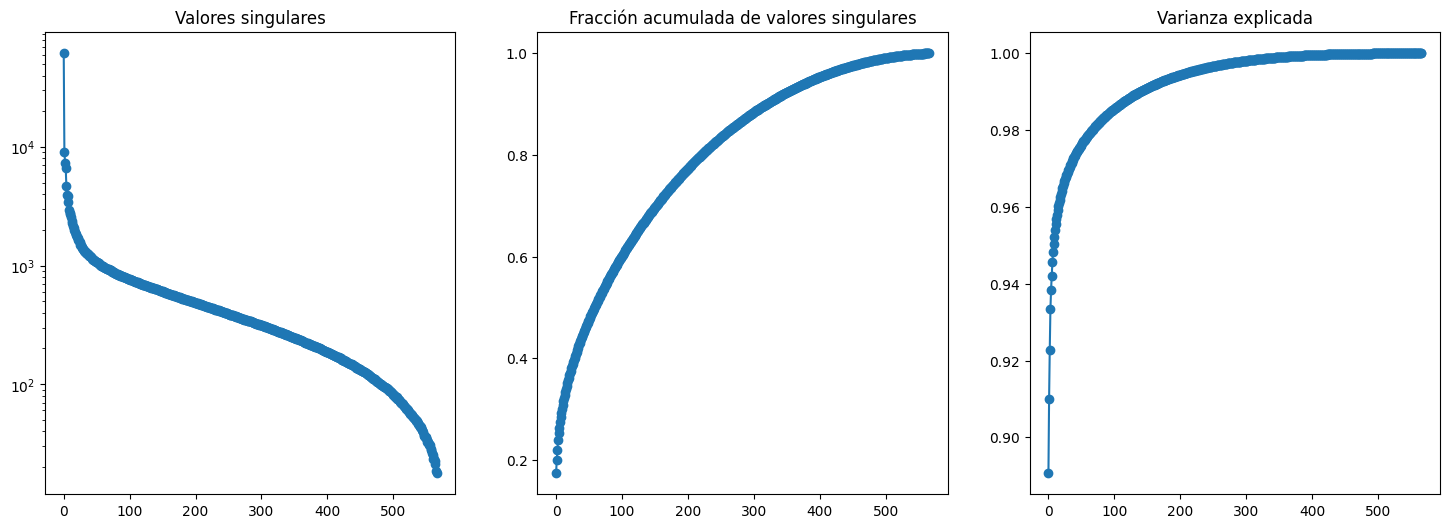

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].semilogy(s, "o-")
axes[0].set_title("Valores singulares")

axes[1].plot(np.cumsum(s) / np.sum(s), "o-")
axes[1].set_title("Fracción acumulada de valores singulares")

axes[2].plot(np.cumsum(s**2) / np.sum(s**2), "o-")
axes[2].set_title("Varianza explicada")

1. Para el primer gráfico, usamos una escala logarítmica en el eje y con la función `semilogy` para visualizar mejor el decaimiento exponencial de los valores singulares. El eje x representa el índice de los valores singulares, mientras que el eje y muestra los valores singulares $\sigma_k$.
2. En el segundo observamos qué proporción del “peso total” de los valores singulares se acumula al sumar los primeros 𝑘. La curva crece rápidamente al inicio, lo que indica que unas pocas componentes capturan una gran parte de la energía lineal del sistema (suma de $\sigma_k$). El aplanamiento progresivo muestra rendimientos decrecientes: añadir más componentes aporta cada vez menos.
3. El tercer gráfico es similar al segundo, pero en este la curva de varianza explicada se eleva incluso más rápido que la del gráfico anterior, porque aquí la contribución está ponderada por $\sigma_k^2$. Esto evidencia que las primeras componentes principales concentran la mayor parte de la energía cuadrática de la matriz (equivalente a la varianza en PCA).

Visualizamos las mejores matrices de rango-$k$ para los valores de $k = 1, 5, 10, 50, 100, 300$.

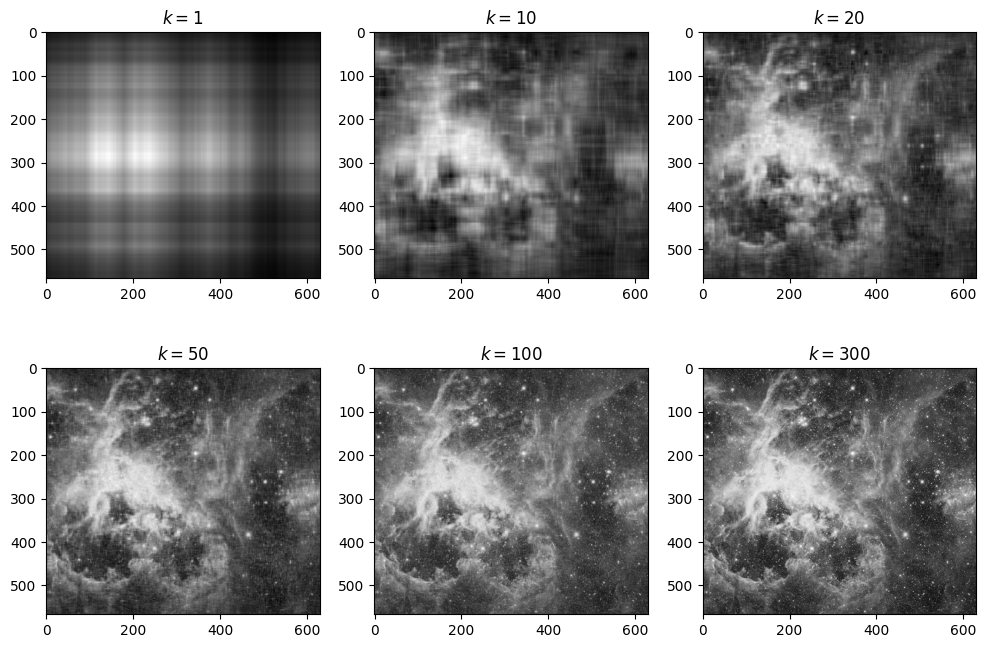

In [ ]:
ks = [1, 10, 20, 50, 100, 300]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.reshape((-1,)) #  Hacemos un array de una dimensión para facilitar el acceso a los ejes

for i, k in enumerate(ks):
    X_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    axs[i].imshow(X_k, cmap='gray')
    axs[i].set_title(f'$k = {k}$')

plt.savefig('output/svd_reconstructed_images.png',
            bbox_inches='tight',
            pad_inches=0.1,
            dpi=300) 

Tal y como se observa, incluso con valores relativamente pequeños de $k$ (por ejemplo, $k=50$ o $k=100$), la imagen reconstruida conserva gran parte de los detalles visuales de la imagen original, incluso en una imagen como esta, que contiene gran cantidad de detalles (si fuese una imagen con menos detalles, la compresión sería aún más efectiva). 

Esto demuestra la eficacia de la SVD para la compresión de imágenes, ya que permite reducir significativamente la cantidad de datos necesarios para representar la imagen sin una pérdida considerable de calidad visual.

Tamaño de la imagen original: 563671 bytes
Tamaño de la imagen reconstruida k=50: 332284 bytes
Tamaño de la imagen reconstruida k=100: 395884 bytes


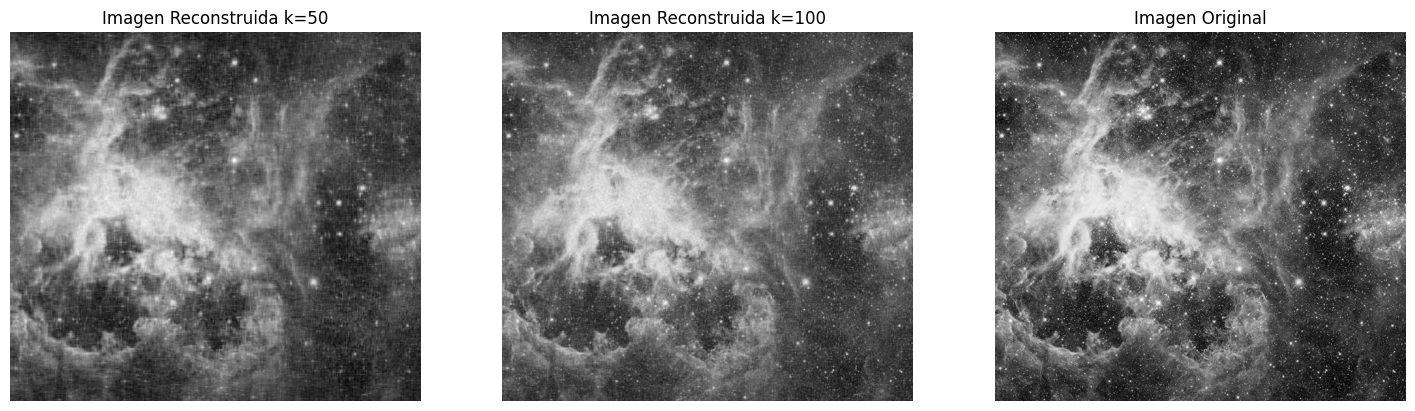

In [34]:
# Almacenamos la figura resultante con k=50 y k = 100 y comparamos el tamaño del archivo con la imagen original
# Guardamos las imágenes reconstruidas con k=50 y k=100
X_50 = U[:, :50] @ np.diag(s[:50]) @ VT[:50, :]
plt.imsave('output/reconstructed_k50.png', X_50, cmap='gray')
X_100 = U[:, :100] @ np.diag(s[:100]) @ VT[:100, :]
plt.imsave('output/reconstructed_k100.png', X_100, cmap='gray')
# Usamos las siguientes líneas para comprobar el tamaño de los archivos
import os
print("Tamaño de la imagen original:", os.path.getsize('output/grayscale_image.png'), "bytes")
print("Tamaño de la imagen reconstruida k=50:", os.path.getsize('output/reconstructed_k50.png'), "bytes")
print("Tamaño de la imagen reconstruida k=100:", os.path.getsize('output/reconstructed_k100.png'), "bytes")

# Comparamos la calidad visual de las imágenes reconstruidas con la original
# Abrimos las imágenes guardadas y las mostramos lado a lado
reconstructed_k50 = imread('output/reconstructed_k50.png')
reconstructed_k100 = imread('output/reconstructed_k100.png')
original = imread('output/grayscale_image.png')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(reconstructed_k50, cmap='gray')
axs[0].set_title('Imagen Reconstruida k=50')
axs[0].axis('off')
axs[1].imshow(reconstructed_k100, cmap='gray')
axs[1].set_title('Imagen Reconstruida k=100')
axs[1].axis('off')
axs[2].imshow(original, cmap='gray')
axs[2].set_title('Imagen Original')
axs[2].axis('off')

plt.show()